In [ ]:
# 导入必要的库
import pandas as pd
import numpy as np
import akshare as ak
import riskparityportfolio as rp
import matplotlib.pyplot as plt

In [2]:
# 获取债券数据
bonds = ak.bond_new_composite_index_cbond(indicator="财富", period="总值")
bonds

,date,value
0,2002-01-04,99.9731
1,2002-01-07,100.0149
2,2002-01-08,99.8273
3,2002-01-09,100.0203
4,2002-01-10,99.9317
...,...,...
5818,2025-04-07,248.4444
5819,2025-04-08,247.9932
5820,2025-04-09,248.0648
5821,2025-04-10,247.9954


In [3]:
# 获取股票数据
stocks = ak.index_zh_a_hist(symbol="800000", period="daily", start_date="19700101", end_date="22220101")
stocks

  0%|          | 0/16 [00:00<?, ?it/s]

,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
0,2001-01-02,2002.73,2026.83,2026.96,2000.80,13252578,2.194403e+10,0.00,0.00,0.00,0.02
1,2001-01-03,2030.79,2043.54,2043.68,2027.77,17940524,2.950718e+10,0.78,0.82,16.71,0.03
2,2001-01-04,2045.85,2036.47,2046.60,2034.65,15588907,2.465915e+10,0.58,-0.35,-7.07,0.02
3,2001-01-05,2037.37,2043.62,2043.70,2035.23,15534304,2.498330e+10,0.42,0.35,7.15,0.02
4,2001-01-08,2047.17,2021.16,2048.46,2014.53,17668633,2.745006e+10,1.66,-1.10,-22.46,0.03
...,...,...,...,...,...,...,...,...,...,...,...
5879,2025-04-07,4989.49,4810.00,5023.14,4733.84,1390400963,1.587080e+12,5.51,-8.40,-441.27,1.97
5880,2025-04-08,4801.03,4869.94,4869.94,4783.60,1480310989,1.625286e+12,1.80,1.25,59.94,2.10
5881,2025-04-09,4806.54,4937.86,4946.39,4722.11,1556459233,1.699274e+12,4.61,1.39,67.92,2.21
5882,2025-04-10,5012.86,5017.11,5055.01,4983.57,1388423373,1.609186e+12,1.45,1.60,79.25,1.97


In [4]:
# 获取期货数据
futures = ak.index_cci_cx()
futures

,日期,大宗商品指数,变化值
0,2009-01-09,100.000000,0.000000
1,2009-01-12,101.643734,1.643734
2,2009-01-13,98.992944,-2.607922
3,2009-01-14,100.396208,1.417539
4,2009-01-15,100.151055,-0.244186
...,...,...,...
3942,2025-04-07,311.984558,-3.522158
3943,2025-04-08,307.534363,-1.426415
3944,2025-04-09,303.279277,-1.383613
3945,2025-04-10,309.560011,2.070941


In [5]:
# 获取黄金数据
gold = ak.futures_hist_em(symbol="沪金主连", period="daily")
gold

,时间,开盘,最高,最低,收盘,涨跌,涨跌幅,成交量,成交额,持仓量
0,2008-07-16,212.88,213.93,212.75,213.93,0.00,0.00,8793,0.000000e+00,0
1,2008-07-17,211.00,212.49,211.00,211.60,-2.33,-1.09,9136,0.000000e+00,0
2,2008-07-18,211.50,211.88,210.80,211.01,-0.59,-0.28,8624,0.000000e+00,0
3,2008-07-21,209.99,211.50,209.52,211.36,0.35,0.17,6369,0.000000e+00,0
4,2008-07-22,211.00,212.00,210.81,211.94,0.58,0.27,7129,0.000000e+00,0
...,...,...,...,...,...,...,...,...,...,...
4073,2025-04-08,718.60,720.38,710.04,719.22,2.64,0.37,559659,4.006052e+11,186814
4074,2025-04-09,718.26,728.50,716.56,728.14,12.34,1.72,527616,3.805886e+11,193197
4075,2025-04-10,729.00,744.88,728.60,744.48,23.16,3.21,703287,5.185469e+11,200633
4076,2025-04-11,743.14,763.62,740.68,757.30,20.00,2.71,769599,5.793095e+11,194428


In [6]:
# 处理债券数据
bonds['date'] = pd.to_datetime(bonds['date'])
bonds = bonds[['date', 'value']].rename(columns={'value': 'bonds_index'})

# 处理股票数据
stocks['日期'] = pd.to_datetime(stocks['日期'])
stocks = stocks[['日期', '收盘']].rename(columns={'日期': 'date', '收盘': 'stocks_index'})

# 处理期货数据
futures['日期'] = pd.to_datetime(futures['日期'])
futures = futures[['日期', '大宗商品指数']].rename(columns={'日期': 'date', '大宗商品指数': 'futures_index'})

# 处理黄金数据
gold['时间'] = pd.to_datetime(gold['时间'])
gold = gold[['时间', '收盘']].rename(columns={'时间': 'date', '收盘': 'gold'})

# 按日期列进行合并，取日期范围的交集
merged_data = bonds.merge(stocks, on='date', how='inner') \
                   .merge(futures, on='date', how='inner') \
                   .merge(gold, on='date', how='inner')

merged_data

,date,bonds_index,stocks_index,futures_index,gold
0,2009-01-09,128.7511,2358.64,100.000000,184.79
1,2009-01-12,128.7626,2368.35,101.643734,186.94
2,2009-01-13,128.6142,2312.11,98.992944,185.82
3,2009-01-14,128.3973,2406.01,100.396208,179.20
4,2009-01-15,128.1127,2413.70,100.151055,180.90
...,...,...,...,...,...
3912,2025-04-07,248.4444,4810.00,311.984558,718.18
3913,2025-04-08,247.9932,4869.94,307.534363,719.22
3914,2025-04-09,248.0648,4937.86,303.279277,728.14
3915,2025-04-10,247.9954,5017.11,309.560011,744.48


In [ ]:
# 筛选2010年以后的数据并重置索引
data = merged_data[merged_data['date'] >= '2010-01-01'].reset_index(drop=True)

In [ ]:
# 初始化滚动再平衡策略的变量
rolling_cumulative_returns = [1]  # 初始累计收益为1
rolling_monthly_returns = []  # 存储每月的非累计收益
rolling_weights = []  # 存储每个再平衡周期的权重
start_date = data['date'].min() + pd.DateOffset(years=1)  # 再平衡的起始日期
end_date = data['date'].max()  # 数据的结束日期
current_date = start_date  # 当前日期初始化为起始日期
budget = [0.25] * 4  # 初始预算分配
balancing_date = []  # 存储再平衡日期

In [ ]:
# 计算所有时间段的对数收益率
all_log_returns = data.set_index('date').apply(lambda x: np.log(x / x.shift(1))).fillna(0)

In [10]:
# 查看对数收益率数据
all_log_returns

,bonds_index,stocks_index,futures_index,gold
date,,,,
2010-01-05,0.000000,0.000000,0.000000,0.000000
2010-01-06,0.000257,-0.006620,0.009220,0.029048
2010-01-07,-0.000107,-0.021183,-0.003422,-0.008447
2010-01-08,-0.000237,0.004239,-0.016065,0.005005
2010-01-11,0.000156,0.002484,0.012355,-0.011398
...,...,...,...,...
2025-04-07,0.004392,-0.087773,-0.035857,-0.028632
2025-04-08,-0.001818,0.012385,-0.014367,0.001447
2025-04-09,0.000289,0.013850,-0.013933,0.012326


In [30]:
# 执行滚动月度再平衡
while current_date <= end_date:
    # 定义回溯期（过去1年）
    balancing_date.append(current_date)
    lookback_start = current_date - pd.DateOffset(years=1)

    # 计算回溯期的协方差矩阵
    lookback_log_returns = all_log_returns.loc[lookback_start:current_date - pd.Timedelta(days=1)]
    lookback_cov_matrix = lookback_log_returns.cov()
    sigma_lookback = np.array(lookback_cov_matrix)

    # 计算回溯期的风险平价权重
    portfolio_lookback = rp.RiskParityPortfolio(covariance=sigma_lookback, budget=budget)
    portfolio_lookback.design()
    weights_lookback = portfolio_lookback.weights
    rolling_weights.append(weights_lookback)

    # 计算当前月份的组合收益
    current_month_log_returns = all_log_returns.loc[current_date:current_date + pd.DateOffset(months=1) - pd.Timedelta(days=1)]
    current_month_portfolio_returns = current_month_log_returns.dot(weights_lookback)

    # 更新累计收益和非累计收益
    for ret in current_month_portfolio_returns:
        rolling_monthly_returns.append(ret)  # 添加非累计收益
        rolling_cumulative_returns.append(rolling_cumulative_returns[-1] * (1 + ret))

    # 移动到下一个月
    current_date += pd.DateOffset(months=1)

  0%|          | 1/500 [00:00<00:14, 35.28it/s]


In [32]:
# 将滚动权重转换为DataFrame并设置索引为再平衡日期
rolling_weights = pd.DataFrame(rolling_weights, columns=['bonds', 'stocks', 'futures', 'gold'])
rolling_weights.index = balancing_date
rolling_weights

,bonds,stocks,futures,gold
0,0.891928,0.025695,0.038474,0.043903
1,0.881149,0.027653,0.042351,0.048847
2,0.878154,0.027421,0.042673,0.051752
3,0.877316,0.027571,0.042672,0.052440
4,0.877151,0.028017,0.042872,0.051961
...,...,...,...,...
167,0.859973,0.034733,0.053826,0.051468
168,0.844309,0.039062,0.059211,0.057418
169,0.839693,0.041208,0.060488,0.058611
170,0.832153,0.044790,0.064327,0.058730


In [34]:
# 使用堆叠柱状图可视化资产权重随时间的变化
rolling_weights.plot(kind='bar', stacked=True, figsize=(12, 8), width=1)

plt.title('资产权重随时间的变化')
plt.xlabel('再平衡周期')
plt.ylabel('权重')
plt.legend(title='资产类别')
plt.grid(axis='y')

# 调整x轴刻度以显示每隔n个标签
plt.xticks(ticks=range(0, len(rolling_weights.index), 6), labels=rolling_weights.index[::6].strftime('%Y-%m'), rotation=45)

plt.show()

,bonds,stocks,futures,gold
2011-01-05,0.891928,0.025695,0.038474,0.043903
2011-02-05,0.881149,0.027653,0.042351,0.048847
2011-03-05,0.878154,0.027421,0.042673,0.051752
2011-04-05,0.877316,0.027571,0.042672,0.052440
2011-05-05,0.877151,0.028017,0.042872,0.051961
...,...,...,...,...
2024-12-05,0.859973,0.034733,0.053826,0.051468
2025-01-05,0.844309,0.039062,0.059211,0.057418
2025-02-05,0.839693,0.041208,0.060488,0.058611
2025-03-05,0.832153,0.044790,0.064327,0.058730


In [39]:
# 将非累计收益转换为pandas Series
rolling_monthly_returns = pd.Series(rolling_monthly_returns, index=all_log_returns.loc[start_date:].index)
rolling_monthly_returns

date
2011-01-05    0.002902
2011-01-06   -0.000579
2011-01-07   -0.000079
2011-01-10   -0.000854
2011-01-11    0.000170
                ...   
2025-04-07   -0.005076
2025-04-08   -0.001793
2025-04-09    0.000734
2025-04-10    0.003427
2025-04-11    0.001424
Length: 3447, dtype: float64

In [13]:
# 将累计收益转换为pandas Series
rolling_cumulative_returns = pd.Series(
    rolling_cumulative_returns[1:],  # 排除初始值
    index=all_log_returns.loc[start_date: ].index  # 匹配索引长度
)
rolling_cumulative_returns

date
2011-01-05    1.002902
2011-01-06    1.002321
2011-01-07    1.002242
2011-01-10    1.001386
2011-01-11    1.001557
                ...   
2025-04-07    1.889421
2025-04-08    1.886033
2025-04-09    1.887417
2025-04-10    1.893886
2025-04-11    1.896583
Length: 3447, dtype: float64

In [14]:
# 复制对数收益率并添加组合收益列
log_returns = all_log_returns.loc[start_date: ].copy()
log_returns['portfolio'] = rolling_monthly_returns
log_returns

,bonds_index,stocks_index,futures_index,gold,portfolio
date,,,,,
2011-01-05,0.002710,0.011516,0.006998,-0.001818,0.002902
2011-01-06,0.000258,-0.005285,0.012013,-0.025867,-0.000579
2011-01-07,0.000670,0.002819,-0.015505,-0.003473,-0.000079
2011-01-10,0.000171,-0.019435,-0.005909,-0.006377,-0.000854
2011-01-11,-0.000281,0.003095,0.000440,0.007380,0.000170
...,...,...,...,...,...
2025-04-07,0.004392,-0.087773,-0.035857,-0.028632,-0.005076
2025-04-08,-0.001818,0.012385,-0.014367,0.001447,-0.001793
2025-04-09,0.000289,0.013850,-0.013933,0.012326,0.000734


In [15]:
# 计算每个资产类别和组合的累计收益
cumulative_returns_assets = (1 + log_returns).cumprod()
cumulative_returns_assets['portfolio'] = rolling_cumulative_returns
cumulative_returns_assets

,bonds_index,stocks_index,futures_index,gold,portfolio
date,,,,,
2011-01-05,1.002710,1.011516,1.006998,0.998182,1.002902
2011-01-06,1.002968,1.006171,1.019095,0.972362,1.002321
2011-01-07,1.003641,1.009008,1.003293,0.968985,1.002242
2011-01-10,1.003812,0.989397,0.997365,0.962806,1.001386
2011-01-11,1.003531,0.992459,0.997804,0.969912,1.001557
...,...,...,...,...,...
2025-04-07,1.894183,1.206997,1.649544,2.016855,1.889421
2025-04-08,1.890740,1.221946,1.625845,2.019774,1.886033
2025-04-09,1.891285,1.238870,1.603193,2.044670,1.887417


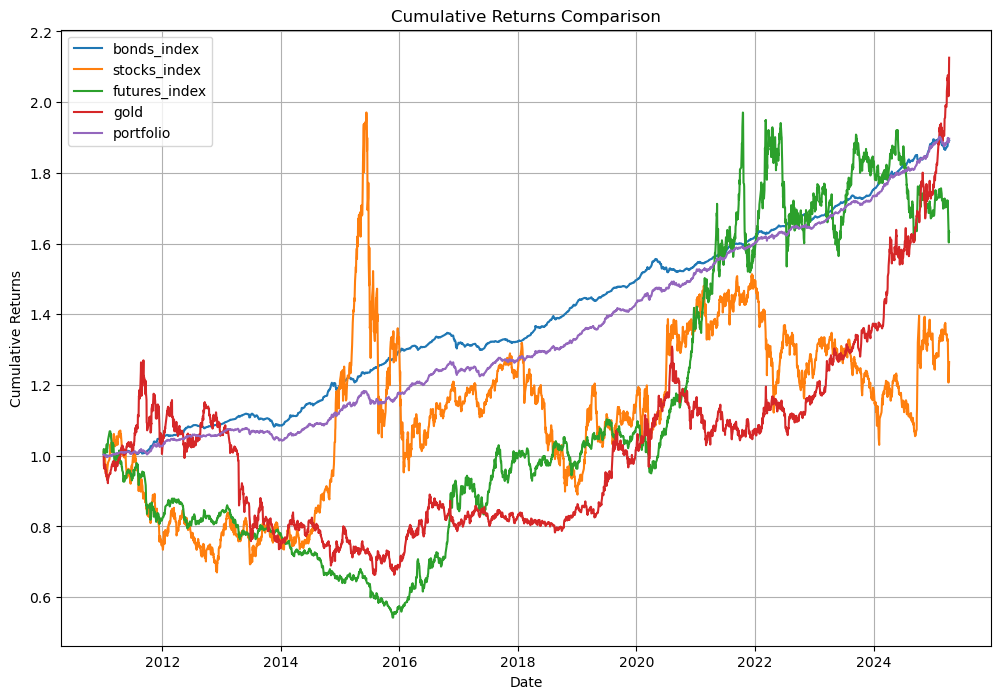

In [ ]:
# 绘制每个资产类别和组合的累计收益对比图
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for column in cumulative_returns_assets.columns:
    plt.plot(cumulative_returns_assets.index, cumulative_returns_assets[column], label=column)

plt.title('累计收益对比')
plt.xlabel('日期')
plt.ylabel('累计收益')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# 定义函数以计算组合的绩效指标
def calculate_metrics(log_returns, cumulative_returns, risk_free_rate):
    sharpe_ratio = (log_returns.mean() - risk_free_rate) / log_returns.std() * np.sqrt(252)  # 夏普比率
    rolling_max = cumulative_returns.cummax()  # 滚动最大值
    drawdown = (cumulative_returns - rolling_max) / rolling_max  # 回撤
    max_drawdown = drawdown.min()  # 最大回撤
    total_return = cumulative_returns.iloc[-1] - 1  # 总收益
    num_years = len(cumulative_returns) / 252  # 年数
    annualized_return = (1 + total_return) ** (1 / num_years) - 1  # 年化收益
    calmar_ratio = annualized_return / abs(max_drawdown) if max_drawdown != 0 else float('inf')  # Calmar比率
    return sharpe_ratio, max_drawdown, annualized_return, calmar_ratio

In [18]:
# 定义无风险利率（例如1.5%年化）
risk_free_rate = 0.015 / 252

# 计算每个资产和组合的绩效指标
metrics = []
for column in cumulative_returns_assets.columns:
    sharpe_ratio, max_drawdown, annualized_return, calmar_ratio = calculate_metrics(
        log_returns[column], cumulative_returns_assets[column], risk_free_rate
    )
    metrics.append({
        '资产': column,
        '夏普比率': sharpe_ratio,
        '最大回撤': max_drawdown,
        '年化收益': annualized_return,
        'Calmar比率': calmar_ratio
    })

# 将指标转换为DataFrame
metrics_df = pd.DataFrame(metrics)
metrics_df

,Asset,Sharpe Ratio,Max Drawdown,Annualized Return,Calmar Ratio
0,bonds_index,2.597235,-0.035763,0.047689,1.333495
1,stocks_index,0.117602,-0.548396,0.017320,0.031582
2,futures_index,0.226398,-0.493223,0.036494,0.073991
3,gold,0.349230,-0.478140,0.056679,0.118541
4,portfolio,1.724912,-0.033316,0.047904,1.437896
